# **Table of Contents**
1) Imports
2) Loading the Dataset and Creating of DataFrame
3) Labelling the classes and plot the Classification Graph

**Importing various Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

**Loading the Dataset , creating a Data Frame which includes labels and saving it to a CSV file** 

In [2]:
# Define dataset path
dataset_path = "/kaggle/input/dataset/DATASET"  # Change this to your dataset's root path

# Initialize lists
image_paths = []
labels = []

# Iterate through main categories (Biodegradable, Nonbiodegradable)
for category in ["Biodegradable", "Nonbiodegradable","Recyclable"]:
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):  # Ensure it's a directory
        for subcategory in os.listdir(category_path):  # Iterate through subcategories
            subcategory_path = os.path.join(category_path, subcategory)

            if os.path.isdir(subcategory_path):  # Ensure it's a directory
                for image_name in os.listdir(subcategory_path):
                    if image_name.endswith((".png", ".jpg", ".jpeg")):  # Filter image files
                        image_paths.append(os.path.join(category, subcategory, image_name))  # Store relative path
                        labels.append(category)  # Assign main category as label

# Create DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": labels})

# Save to CSV
csv_path = "/kaggle/working/dataset_labels.csv"
df.to_csv(csv_path, index=False)

print(f"Dataset labels saved to {csv_path}")


Dataset labels saved to /kaggle/working/dataset_labels.csv


**Display the Classified Dataframe**

In [7]:
df = pd.read_csv("/kaggle/input/labels/dataset_labels.csv")
print(df.head())

                                          image_path          label
0              Biodegradable/leaf_waste/00000042.jpg  Biodegradable
1              Biodegradable/leaf_waste/00000080.jpg  Biodegradable
2              Biodegradable/leaf_waste/00000113.jpg  Biodegradable
3  Biodegradable/leaf_waste/a6876e29-dc0f-4716-bd...  Biodegradable
4              Biodegradable/leaf_waste/00000115.jpg  Biodegradable


In [10]:
dff=pd.DataFrame(df)
dff.tail()

,image_path,label
31069,Recyclable/paper_cups/Image_60.png,Recyclable
31070,Recyclable/paper_cups/Image_132.png,Recyclable
31071,Recyclable/paper_cups/Image_4 (2).png,Recyclable
31072,Recyclable/paper_cups/Image_165.png,Recyclable
31073,Recyclable/paper_cups/Image_27 (2).png,Recyclable



**Plotting a Bar Graph which displays how many images belong to a Specific class.The classes are Biodegradable,Non Biodegradable and Recyclable**


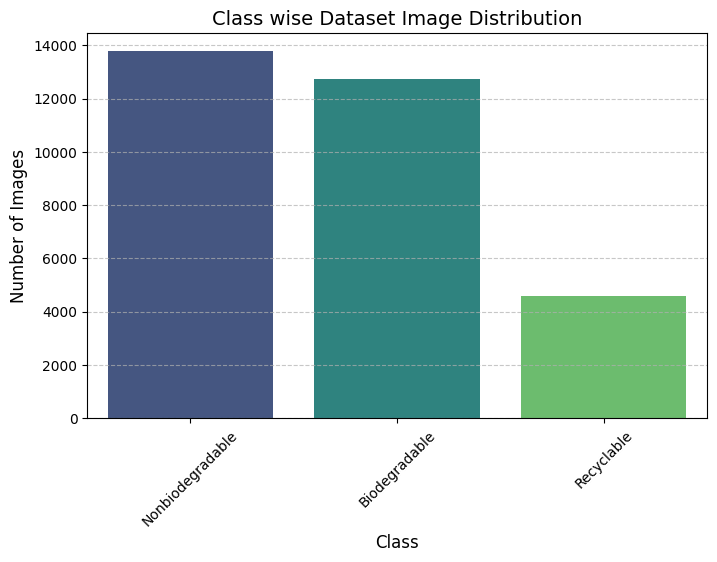

In [13]:
# Load dataset labels CSV
csv_path = "/kaggle/input/labels/dataset_labels.csv"  # Change if needed
df = pd.read_csv(csv_path)

# Count images per class
class_counts = df["label"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class wise Dataset Image Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
